# Pymaceuticals Inc.
---

### Analysis

- The mice were pretty evenly distributed between gender.
- The treatment started to work on Mouse r944 around day 10, and at day 35 the tumor shrank to its smallest size.
- There seemed to be a rebound in tumor growth after day 35.
- Capomulin seemed to be the most overall consistent based on standard deviation.
- Capomulin was the most used treatment.
 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_data_complete_df = pd.merge(mouse_metadata, study_results, how = 'right', on = 'Mouse ID')

# Display the data table for preview
mouse_data_complete_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [52]:
# Checking the number of mice.
mouse_count = mouse_data_complete_df['Mouse ID'].nunique()
mouse_count

249

In [53]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
group_mouses_df = mouse_data_complete_df.groupby(['Mouse ID', 'Timepoint'])['Timepoint'].count()
group_mouses_df.sort_values(ascending = False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Name: Timepoint, Length: 1888, dtype: int64

In [54]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_data_complete_df.loc[mouse_data_complete_df['Mouse ID'] == 'g989']


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   
1195     g989     Propriva  Female          21          26         25   
1380     g989     Propriva  Female          21          26         30   
1592     g989     Propriva  Female          21          26         35   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            47.570392                 0  
620            51.745156                 0  
681            49.880528                 0  
815            51.325852                 1  
869            53.442020                 0  
950            55.326122                 1  
1111           54.657650                 1  
1195           56.045564                 1  
1380           59.082294                 1  
1592           62.570880                 2

In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_duplicated_mouse_df = mouse_data_complete_df.loc[mouse_data_complete_df['Mouse ID'] != 'g989']
dropped_duplicated_mouse_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        b128    Capomulin  Female           9          22          0   
1        f932     Ketapril    Male          15          29          0   
2        g107     Ketapril  Female           2          29          0   
3        a457     Ketapril  Female          11          30          0   
4        c819     Ketapril    Male          21          25          0   
...       ...          ...     ...         ...         ...        ...   
1888     r944    Capomulin    Male          12          25         45   
1889     u364    Capomulin    Male          18          17         45   
1890     p438     Ceftamin  Female          11          26         45   
1891     x773      Placebo  Female          21          30         45   
1892     b879     Stelasyn  Female           4          26         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              45.000000                 0  
2              45.000000                 0  
3              45.000000                 0  
4              45.000000                 0  
...                  ...               ...  
1888           41.581521                 2  
1889           31.023923                 3  
1890           61.433892                 1  
1891           58.634971                 4  
1892           72.555239                 2  

[1880 rows x 8 columns]

In [56]:
# Checking the number of mice in the clean DataFrame.
dropped_mouse_count = dropped_duplicated_mouse_df['Mouse ID'].nunique()
dropped_mouse_count

248

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

duplicated_index = dropped_duplicated_mouse_df.groupby('Drug Regimen')

tumor_volume_mean = dropped_duplicated_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median = dropped_duplicated_mouse_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median()
tumor_volume_variance = dropped_duplicated_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_sdev = dropped_duplicated_mouse_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std()
tumor_volume_sem = dropped_duplicated_mouse_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:


# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
#drug_name = dropped_duplicated_mouse_df.loc[dropped_duplicated_mouse_df['Drug Regimen']]

tumor_volume_df = pd.DataFrame({'Mean Tumor Volume' : tumor_volume_mean,
                                'Median Tumor Volume' : tumor_volume_median,
                                'Tumor Volume Variance' : tumor_volume_variance,
                                'Tumor Volume Std. Dev' : tumor_volume_sdev,
                                'Tumor Volume Std. Err.' : tumor_volume_sem
    })
tumor_volume_df.head()

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   

              Tumor Volume Std. Dev  Tumor Volume Std. Err.  
Drug Regimen                                                 
Capomulin                  4.994774                0.329346  
Ceftamin                   6.268188                0.469821  
Infubinol                  6.567243                0.492236  
Ketapril                   8.279709                0.603860  
Naftisol                   8.134708                0.596466

In [58]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = dropped_duplicated_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(mean='mean', 
                                                                                       median='median', 
                                                                                       variance='var', 
                                                                                       standard_deviation='std', 
                                                                                       SEM=lambda x: x.std()/(len(x)**0.5)).reset_index()
print(agg_summary)

  Drug Regimen       mean     median   variance  standard_deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.320930  50.446266  43.852013            6.622085  0.544332
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

<Axes: title={'center': 'Total Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Timepoints'>

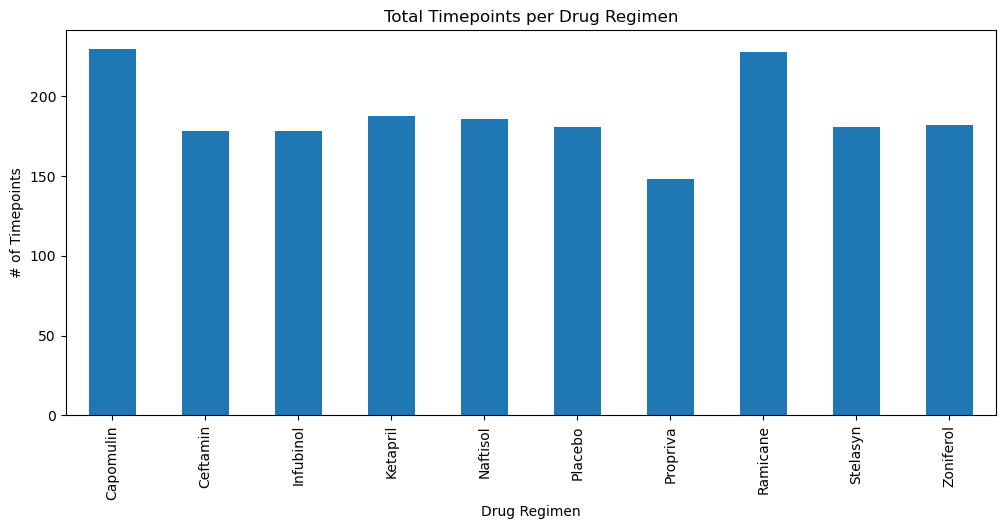

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = dropped_duplicated_mouse_df.groupby('Drug Regimen').size()
drug_counts.plot(kind='bar', figsize=(12,5), title='Total Timepoints per Drug Regimen',
                xlabel='Drug Regimen', ylabel='# of Timepoints')
                

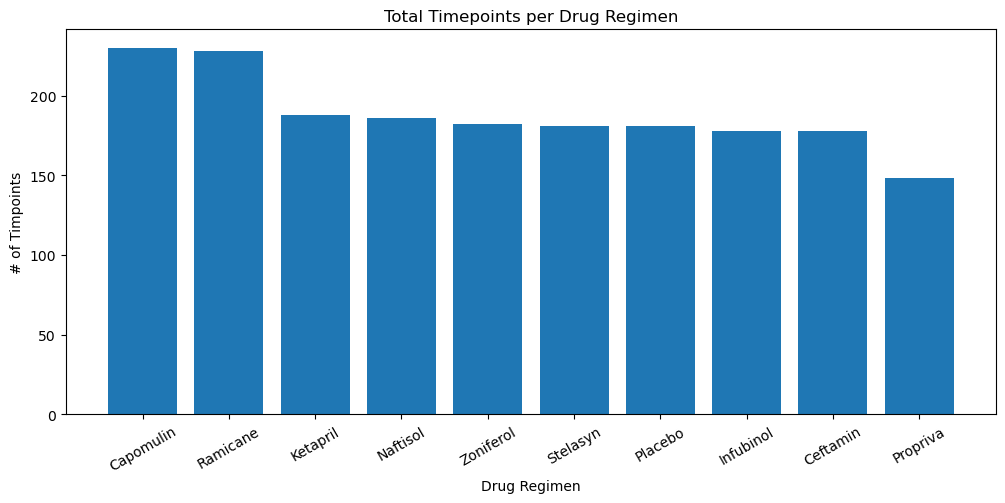

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts_pyplot = dropped_duplicated_mouse_df['Drug Regimen'].value_counts()
plt.figure(figsize =(12,5))
plt.bar(drug_counts_pyplot.index, drug_counts_pyplot.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timpoints')
plt.title('Total Timepoints per Drug Regimen')
plt.xticks(rotation=30)
plt.show()

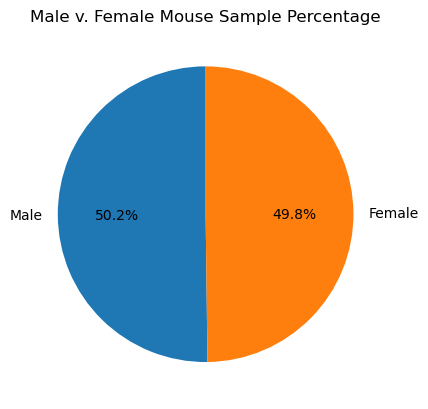

In [61]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
mouse_gender = mouse_data_complete_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_count = mouse_gender['Sex'].value_counts()
gender_count.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Male v. Female Mouse Sample Percentage')
plt.ylabel('')
plt.show()



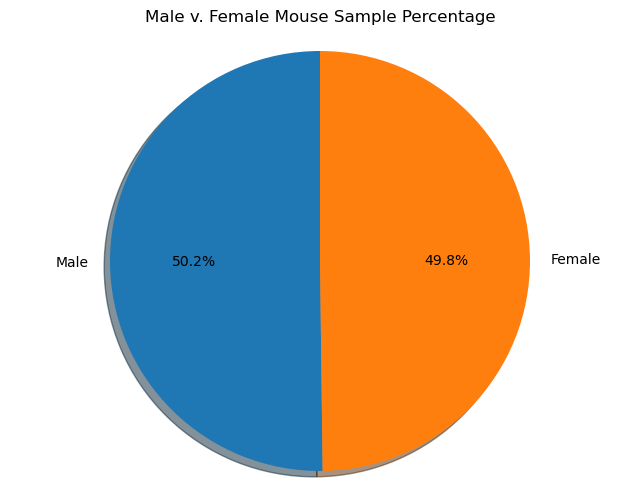

In [62]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plt.figure(figsize=(8,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Male v. Female Mouse Sample Percentage')
plt.axis('equal')
plt.show()



## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_vol_df = dropped_duplicated_mouse_df.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()
final_merged_df = final_tumor_vol_df.merge(dropped_duplicated_mouse_df, on=['Mouse ID', 'Timepoint'])
final_volume = final_merged_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]



In [64]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
final_timpoint_df = dropped_duplicated_mouse_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_merged_df = pd.merge(final_timpoint_df, dropped_duplicated_mouse_df, on=['Mouse ID', 'Timepoint'])
last_volumes_df = last_merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
last_volumes = last_volumes_df[last_volumes_df['Drug Regimen'].isin([
    'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
print(last_volumes_df)

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
2       a262      Placebo           70.717621
3       a275     Ceftamin           62.999356
4       a366     Stelasyn           63.440686
..       ...          ...                 ...
243     z435     Propriva           48.710661
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451
246     z795     Naftisol           65.741070
247     z969     Naftisol           73.867845

[248 rows x 3 columns]


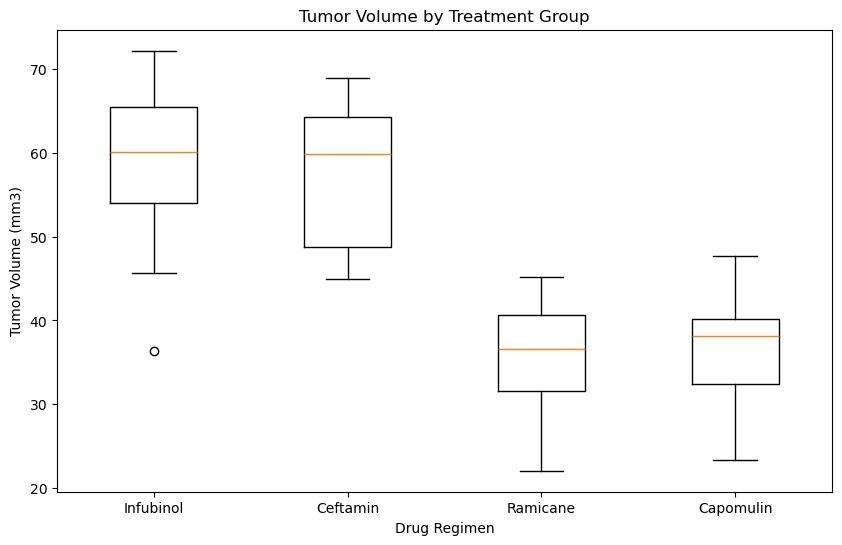

In [65]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot([last_volumes[last_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] 
             for treatment in last_volumes['Drug Regimen'].unique()],
            labels=last_volumes['Drug Regimen'].unique())

# Step 2: Customize the plot
plt.title('Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

#quartiles = last_volumes.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile is: {lowerq}")
#print(f"The upper quartile is: {upperq}")
#print(f"The interquartile range of is: {iqr}")
#print(f"The the median of is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.") 
# Step 3: Show the plot
plt.show()


## Line and Scatter Plots

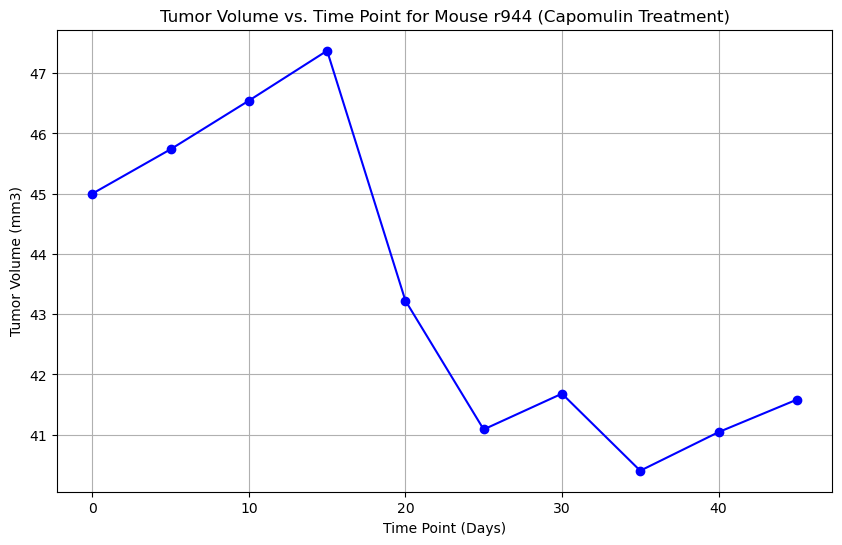

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'r944'  # Replace with the ID of the mouse you want to plot
mouse_data = dropped_duplicated_mouse_df[(dropped_duplicated_mouse_df['Mouse ID'] == mouse_id) & 
    (dropped_duplicated_mouse_df['Drug Regimen'] == 'Capomulin')]

# Step 2: Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Step 3: Customize the plot
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Step 4: Show the plot
plt.show()

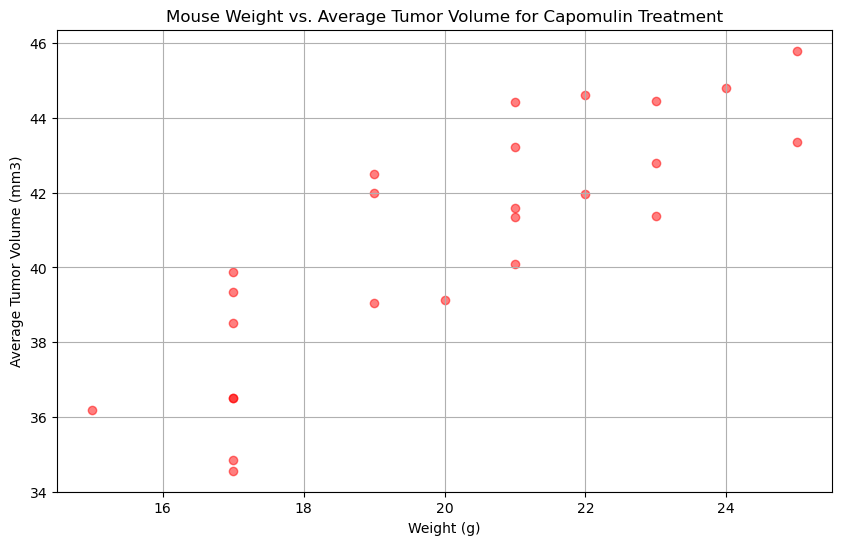

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = dropped_duplicated_mouse_df[dropped_duplicated_mouse_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='r', alpha=0.5)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

The r-squared or correlation is: 0.7088568047708723


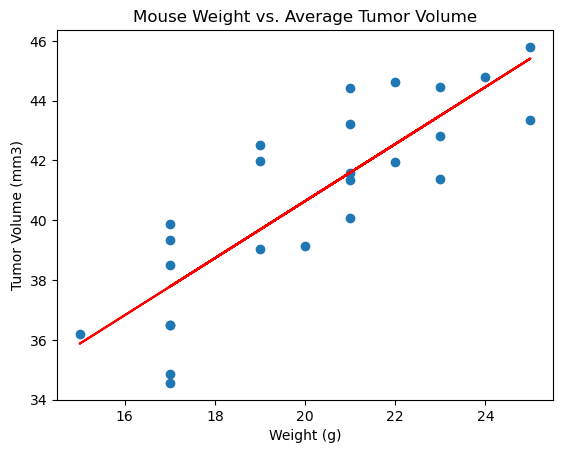

In [69]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_axis = avg_tumor_volume['Weight (g)']
y_axis = avg_tumor_volume['Tumor Volume (mm3)']

plt.title('Mouse Weight vs. Average Tumor Volume')
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Print out the r-squared value along with the plot.
print(f"The r-squared or correlation is: {rvalue**2}")
plt.show()